In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
df.shape

(60000, 785)

In [5]:
df.isnull().sum().sort_values(ascending=False)

label       0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
pixel784    0
Length: 785, dtype: int64

In [6]:
df.duplicated().sum()

43

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print("Labels : ", df['label'].unique())

Labels :  [2 9 6 0 3 4 5 8 7 1]


In [9]:
np.set_printoptions(linewidth = 300)
df[df['label']==1].iloc[1,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 162, 214, 199, 196, 204, 189, 193, 211, 211, 197, 214, 244,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 182, 203, 219, 235, 219, 219, 226, 211, 210, 220, 215, 218,  57,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202, 199, 204, 214, 217, 216, 231, 204, 206, 206, 207, 217, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  20, 241, 196, 208, 202, 207, 200, 249, 197, 189, 198, 199, 225, 129,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 247, 196, 195, 180, 206, 201, 230, 194, 174, 183, 189, 210, 163,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  71, 240, 198, 190, 188, 209, 202, 216, 187, 179, 189, 187, 209

(-0.5, 27.5, 27.5, -0.5)

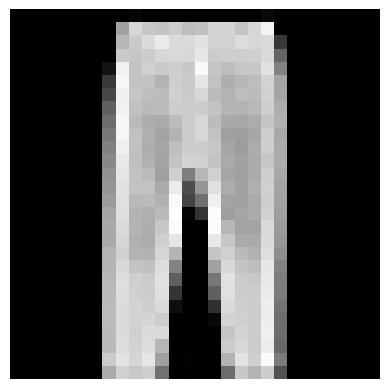

In [10]:
image = df[df['label']==1].iloc[1,1:].values.reshape(28,28)
plt.imshow(image, cmap='gray')
plt.axis('off')

In [11]:
print(df['label'][1])

9


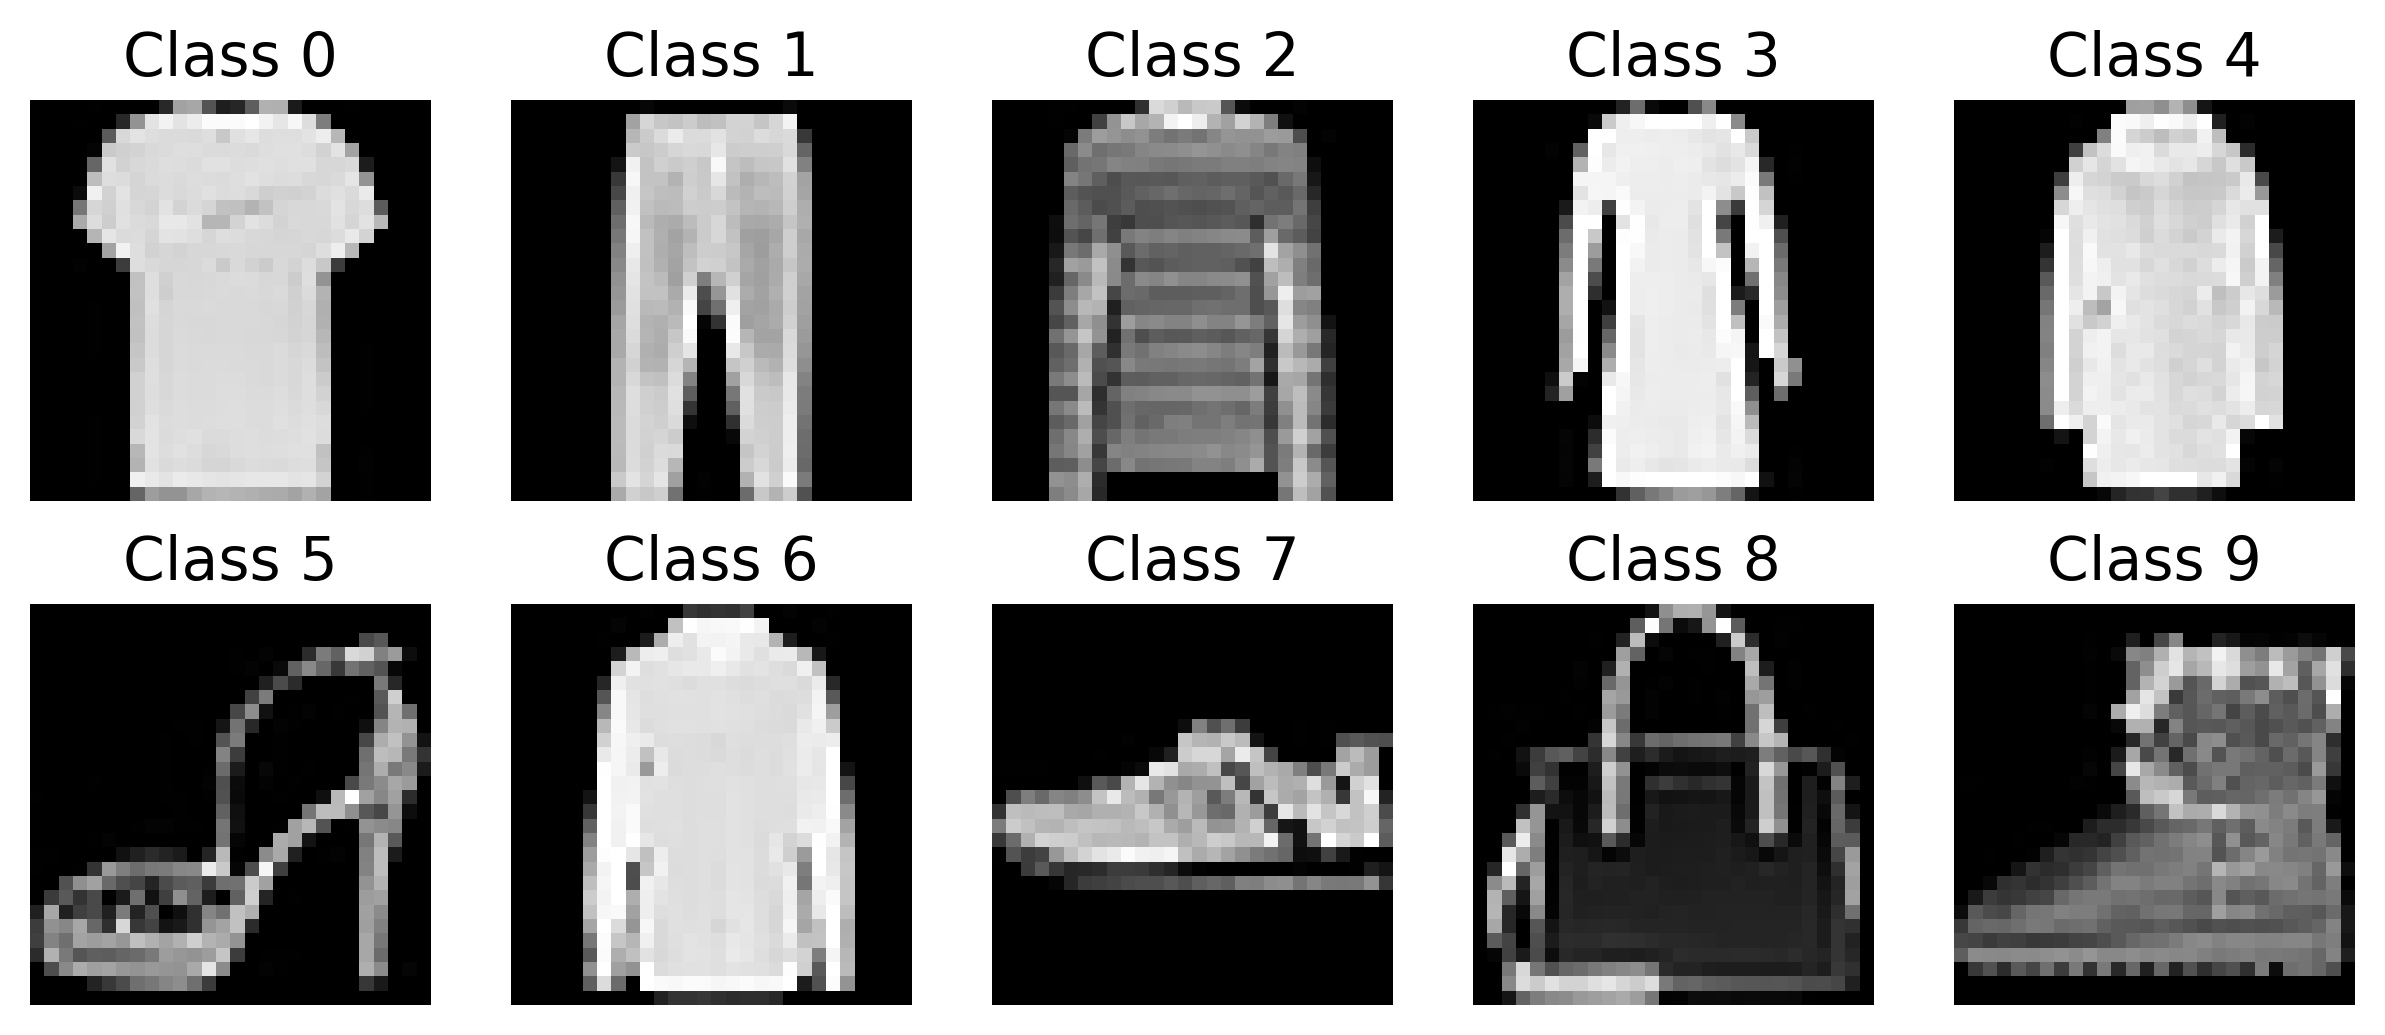

In [12]:
plt.figure(figsize=(10,4), dpi=300)
for i in range(10):
    plt.subplot(2,5,i+1)
    image = df[df['label']==i].iloc[1,1:].values.reshape(28,28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()

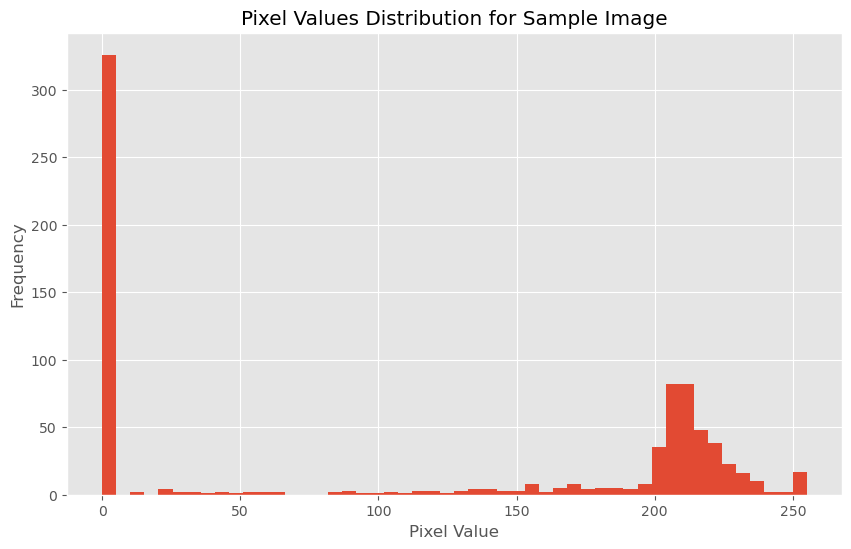

In [13]:
# Visualize pixel values distribution for a sample image
sample_image = df.iloc[0, 1:].values
plt.figure(figsize=(10, 6))
plt.hist(sample_image, bins=50)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Values Distribution for Sample Image')
plt.show()

       label
Image       
0       5998
1       5996
2       5988
3       5997
4       5995
5       6000
6       5989
7       5996
8       6000
9       5998


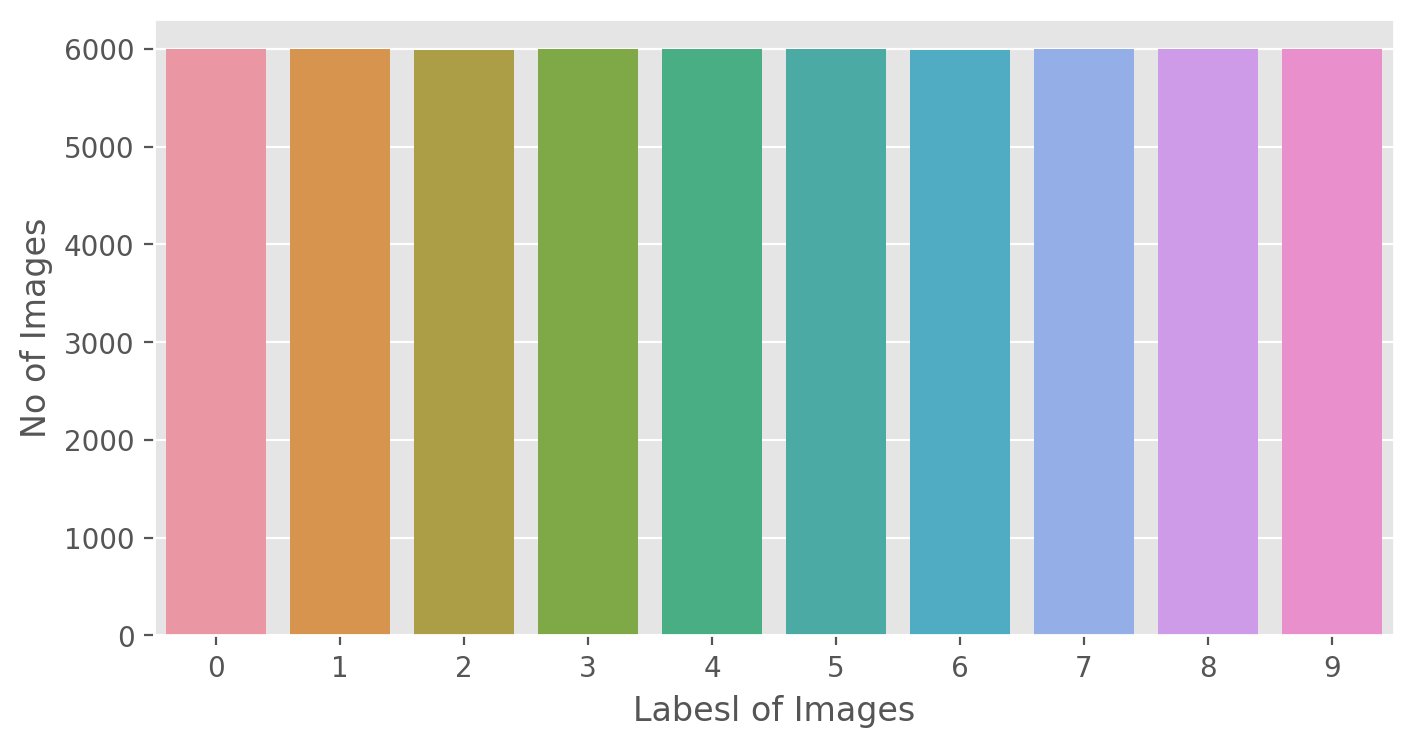

In [14]:
print(pd.DataFrame(df['label'].value_counts()).sort_index().rename_axis('Image'))

plt.figure(figsize=(8,4), dpi=200)
sns.countplot(x=df['label'])
plt.xlabel("Labesl of Images")
plt.ylabel("No of Images")
plt.show()

In [15]:
X = df.drop('label',axis=1)
Y = df[['label']]
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y.head()

,label
0,2
1,9
2,6
3,0
4,3


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [18]:
print('Traning Data Shape : ', x_train.shape)
print('Traning Label Shape: ', y_train.shape)
print('Test Data Shape    : ', x_test.shape)
print('Test Label Shape   : ', y_test.shape)

Traning Data Shape :  (47965, 784)
Traning Label Shape:  (47965, 1)
Test Data Shape    :  (11992, 784)
Test Label Shape   :  (11992, 1)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  


acc_train = []
acc_test = []

for k in range(1,16):
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=2)
    classifier.fit(x_train,y_train)
    
    pred_train = classifier.predict(x_train.values)
    pred_test = classifier.predict(x_test.values)
    
    acc_train.append(accuracy_score(y_train, pred_train))
    acc_test.append(accuracy_score(y_test, pred_test))


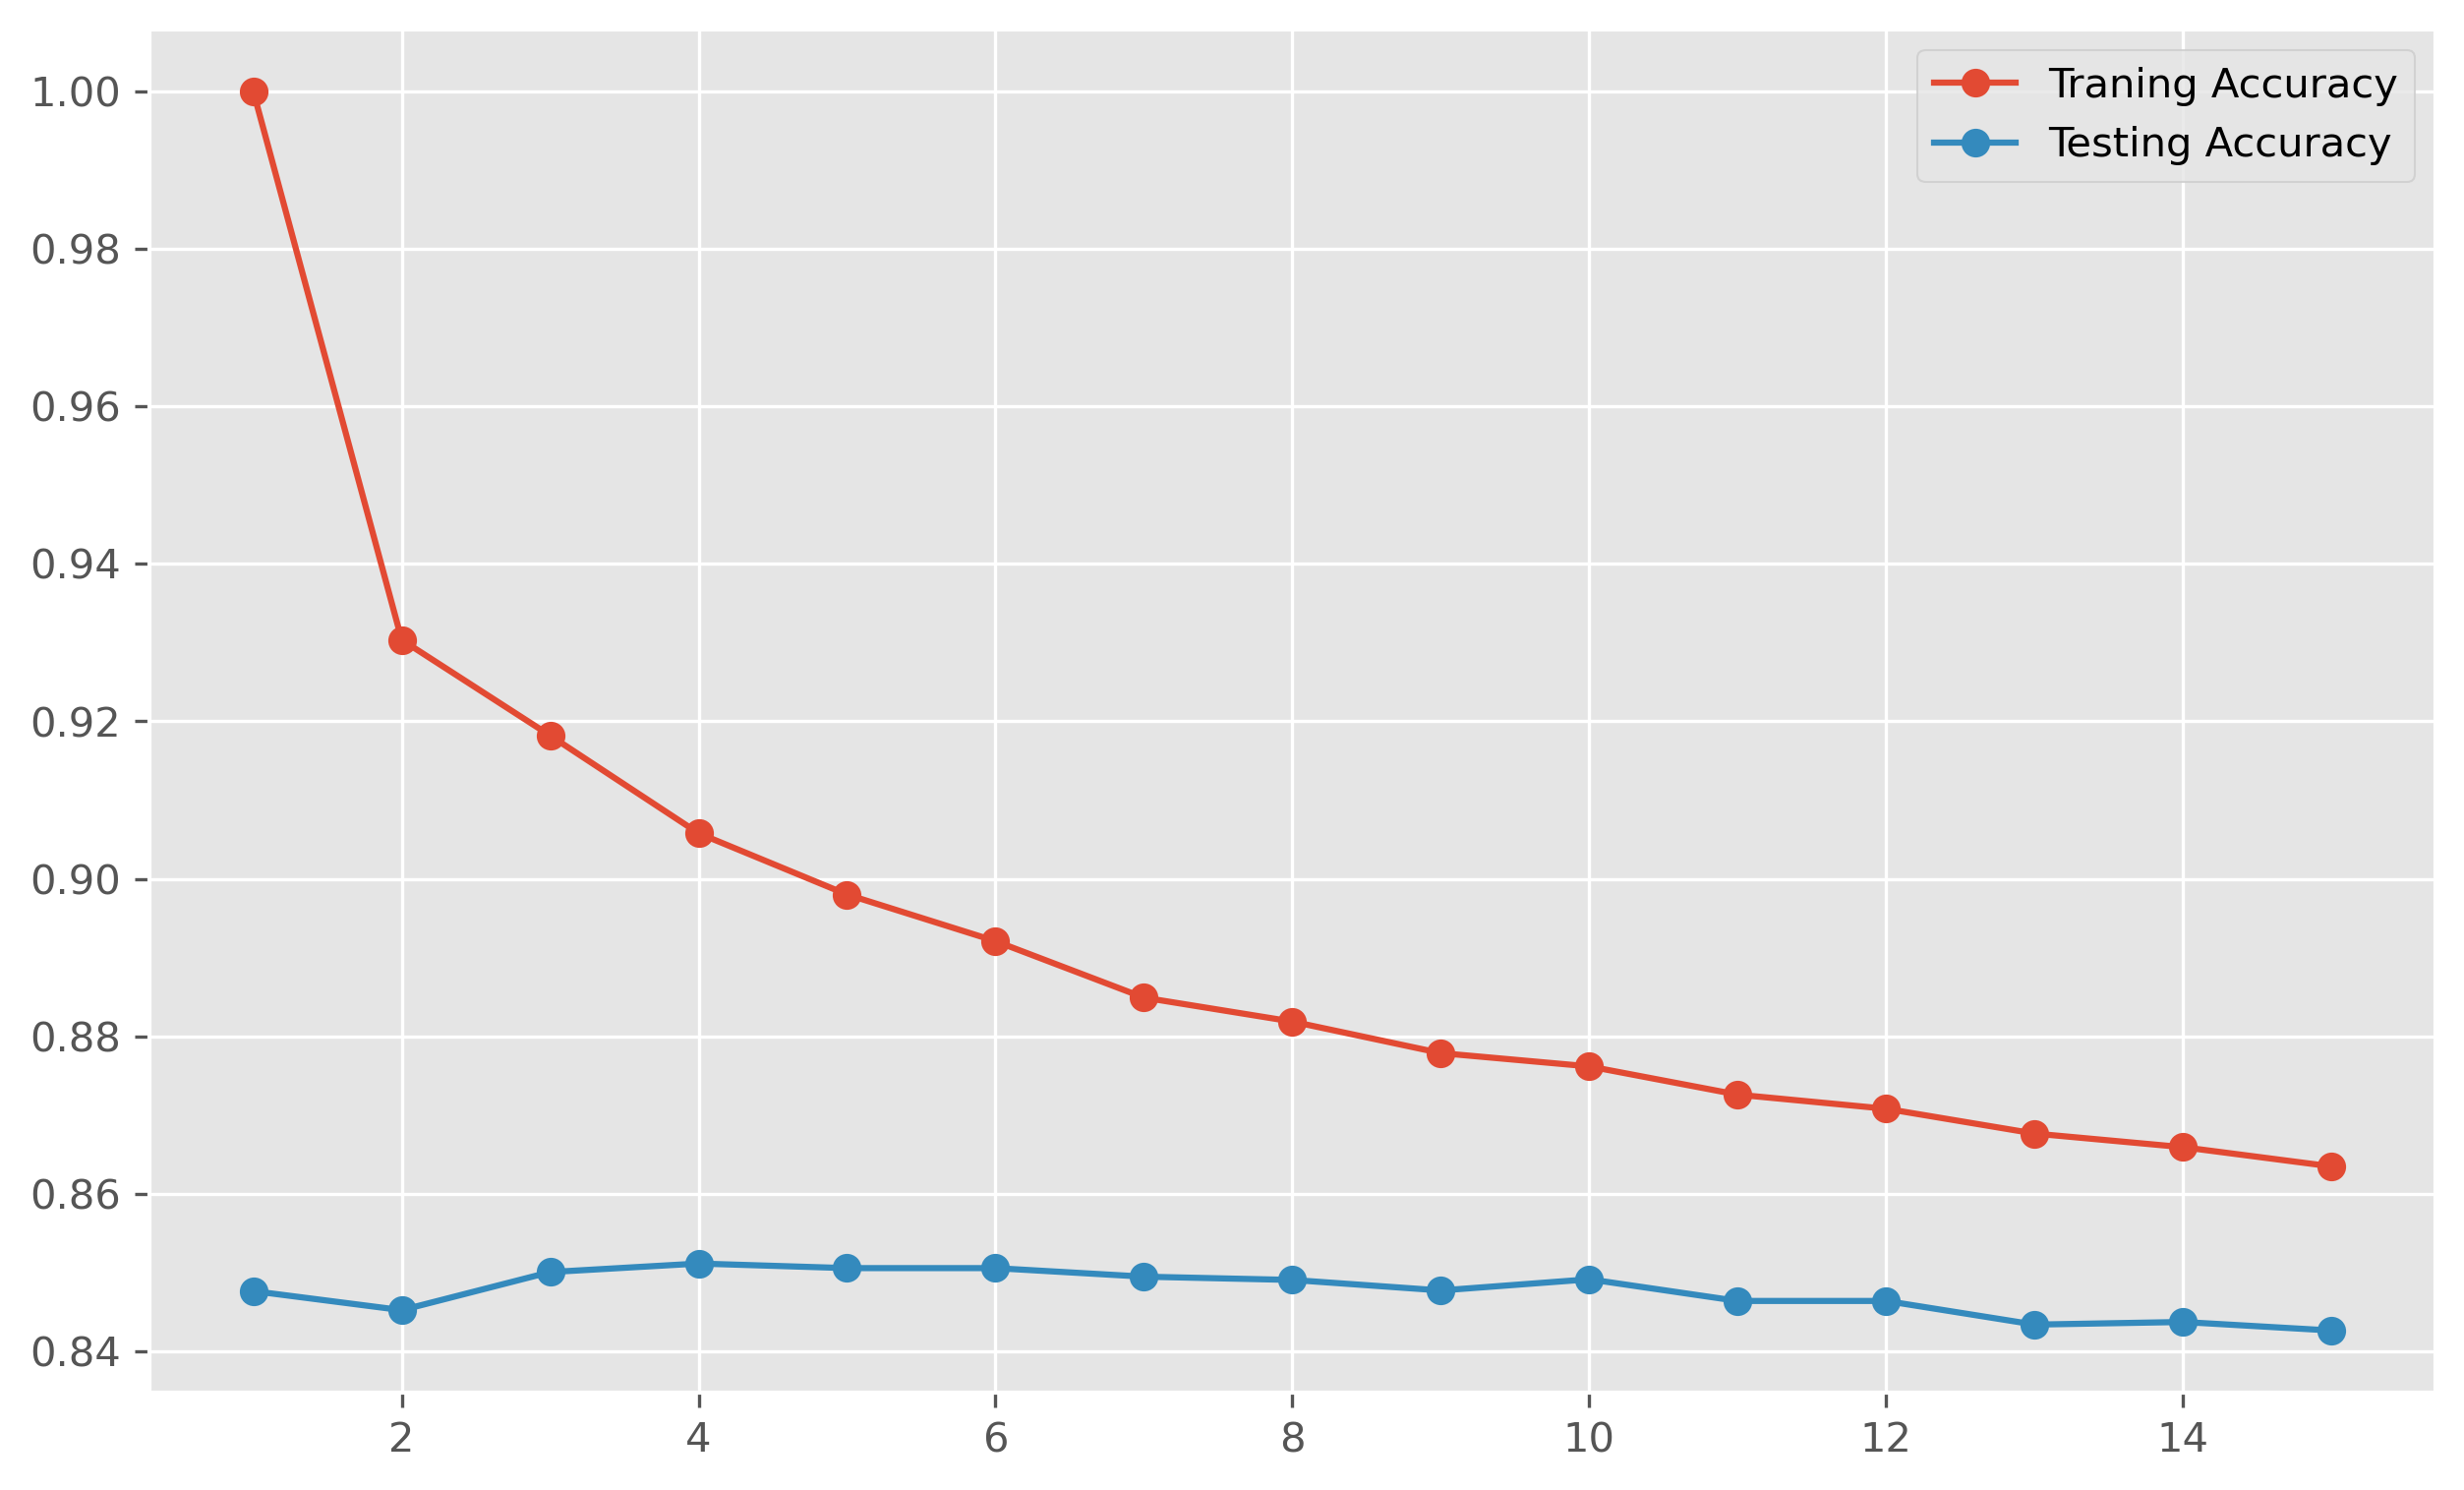

In [33]:
k = range(1,16)
plt.figure(figsize=(10,6), dpi=300)
plt.plot(k,acc_train,'-o', label="Traning Accuracy")
plt.plot(k,acc_test, '-o', label="Testing Accuracy")

plt.legend()
plt.show()



In [38]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': [2, 3, 4],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

best_knn_model = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model
pred_train = best_knn_model.predict(x_train)
pred_test = best_knn_model.predict(x_test)

print('Training Set Score:')
print(classification_report(y_train, pred_train))

print('Testing Set Score:')
print(classification_report(y_test, pred_test))



Best Parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best Score: 0.859939539247368
Training Set Score:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4794
           1       1.00      1.00      1.00      4828
           2       1.00      1.00      1.00      4781
           3       1.00      1.00      1.00      4796
           4       1.00      1.00      1.00      4756
           5       1.00      1.00      1.00      4776
           6       1.00      1.00      1.00      4803
           7       1.00      1.00      1.00      4834
           8       1.00      1.00      1.00      4834
           9       1.00      1.00      1.00      4763

    accuracy                           1.00     47965
   macro avg       1.00      1.00      1.00     47965
weighted avg       1.00      1.00      1.00     47965

Testing Set Score:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1